# Modelo red neuronal mas simple

In [2]:
from importacion_preprocesado import download_and_load_data, preprocesamiento


tamany_img = (128,128) # tamaño reducido para colab porque si no supera la ram
X, y = download_and_load_data(target_size=tamany_img)

X_train, X_val, X_test, y_train, y_val, y_test = preprocesamiento(X, y)

Dataset ya existe, solo se van a cargar las imágenes.
X shape: (4217, 128, 128, 3) y shape: (4217,)


In [18]:
# Importar la función
from models.simple_cnn import create_model

# Crear el modelo
model = create_model(input_shape=(128,128,3), num_classes=4)

In [19]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)

hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5670 - loss: 1.9486 - val_accuracy: 0.6765 - val_loss: 0.7407
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7212 - loss: 0.6634 - val_accuracy: 0.7097 - val_loss: 0.6496
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7493 - loss: 0.6075 - val_accuracy: 0.7524 - val_loss: 0.6047
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7888 - loss: 0.5135 - val_accuracy: 0.7630 - val_loss: 0.5997
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8070 - loss: 0.4750 - val_accuracy: 0.7607 - val_loss: 0.5706
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8458 - loss: 0.4074 - val_accuracy: 0.7773 - val_loss: 0.5695
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8438 - loss: 0.4141 - val_accuracy: 0.7690 - val_loss: 0.5807
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8189 - loss: 0.4485 - val_accuracy: 0.7796 - v

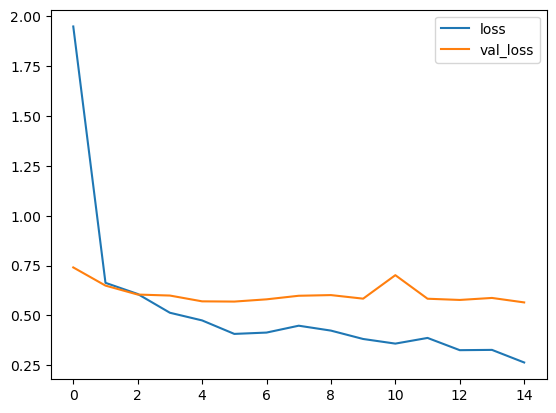

In [20]:
import matplotlib.pyplot as plt
# Visualize loss evolution during training
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,f1_score

def evaluate(model, X, y):
    #Convertir a enteros
    y_true = np.argmax(y, axis=1)

    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    return acc, f1

def crear_df_metricas(X_train= X_train, X_val = X_val, X_test = X_test, y_train = y_train, y_val = y_val, y_test = y_test):
    #Obtenemos las metricas
    acc_train, f1_train = evaluate(model, X_train, y_train)
    acc_val, f1_val = evaluate(model, X_val, y_val)
    acc_test, f1_test = evaluate(model, X_test, y_test)

    #Creamos el dataframe
    df = pd.DataFrame( 
                {"Train":[acc_train, f1_train],
                "Val":[acc_val, f1_val],
                "Test":[acc_test,f1_test]},
                index = ["Accuracy", "F1"])
    return  df


In [46]:
df = crear_df_metricas()
df

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Train,Val,Test
Accuracy,0.924871,0.795024,0.808057
F1,0.924512,0.790596,0.804333


In [55]:
def plot_barra(metrica, titulo, color):

    plt.figure(figsize=(6,4))
    bars = plt.bar(metrica.index, metrica.values, color=color)
    plt.bar_label(bars)
    plt.title(f"{titulo}: Train vs Validation vs Test")
    plt.ylabel(titulo)
    plt.ylim(0,1)
    plt.grid(axis='y', linestyle='--')
    plt.show()


def plots_metricas(df):
    #Extraemos la fila
    accuracy = df.loc["Accuracy"]
    f1 = df.loc["F1"]

    #Grafico de Accuracy
    plot_barra(accuracy, titulo = "Accuracy", color="blue")

    #Grafico de 
    plot_barra(f1, titulo ="F1", color = "red")

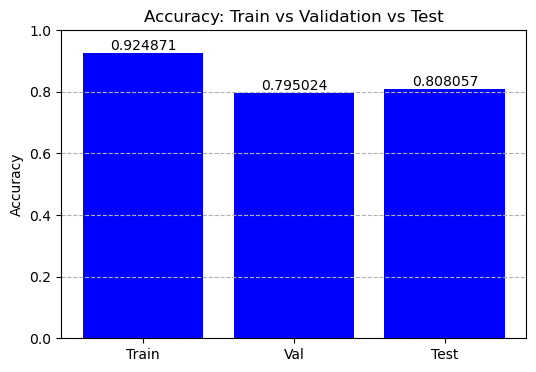

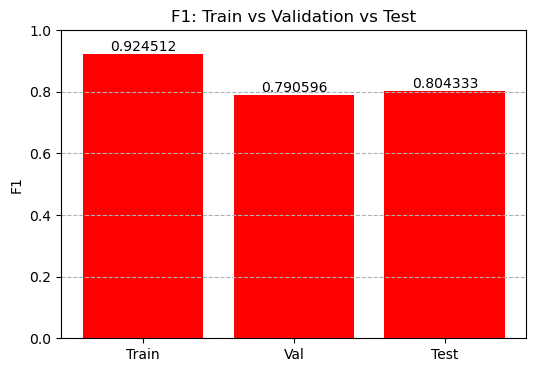

In [56]:
plots_metricas(df)